In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.feature_selection import *

In [3]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Пропуски

In [5]:
#пропуски
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Пропусков нет

# Выбросы

In [6]:
#преобразование целевой переменной
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

#числовые
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

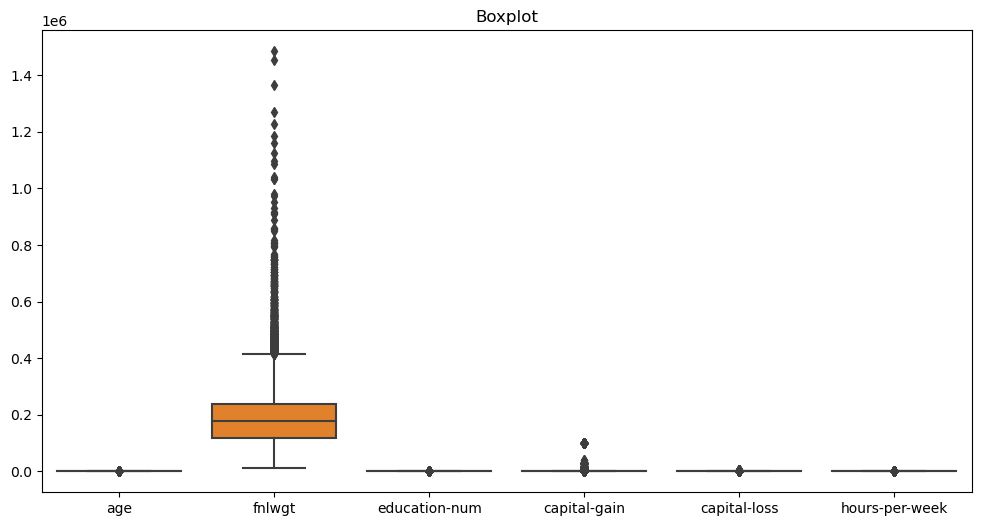

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot')
plt.show()

In [8]:
def replace(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #замена! выбросов!
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    return df

df = replace(df, numerical_columns)

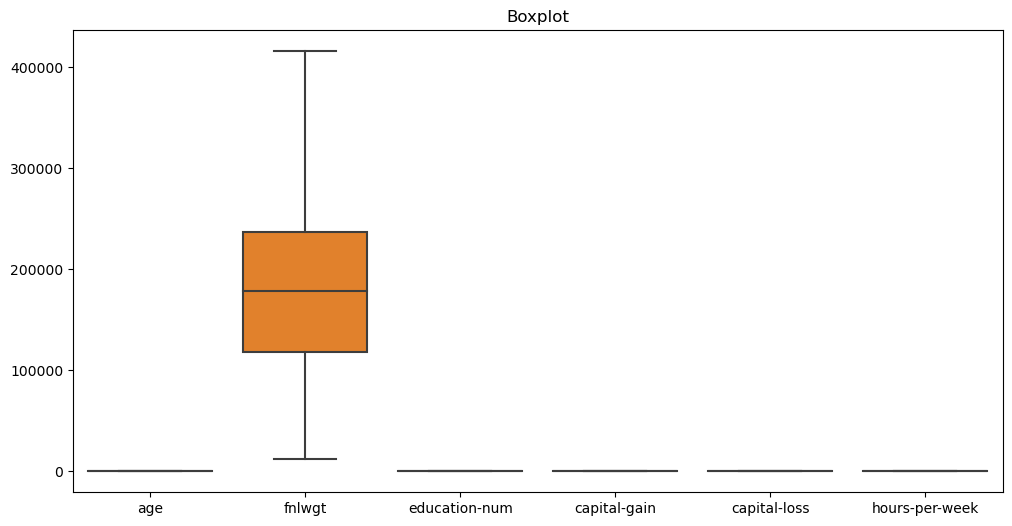

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot')
plt.show()

# Влияние marital-status на целевую переменную

In [10]:
import scipy.stats as stats

contingency_table = pd.crosstab(df['marital-status'], df['income'])
contingency_table

income,0,1
marital-status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [11]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("\nРезультат теста: Отвергаем нулевую гипотезу.")
    print("Есть статистически значимая зависимость между marital-status и income.")
else:
    print("\nРезультат теста: Не отвергаем нулевую гипотезу.")
    print("Нет достаточных оснований для утверждения о зависимости между marital-status и income.")


Результат теста: Отвергаем нулевую гипотезу.
Есть статистически значимая зависимость между marital-status и income.


# Укрупняем признак

In [12]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [13]:
#пусть будет женат/не женат
df['marital-status'] = df['marital-status'].str.strip()
df['marital-status'] = df['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Not-married',
    'Divorced': 'Not-married',
    'Widowed': 'Not-married',
    'Separated': 'Married'
})

contingency_table = pd.crosstab(df['marital-status'], df['income'])
contingency_table

income,0,1
marital-status,,
Married,9640,6802
Not-married,15080,1039


In [14]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("\nРезультат теста: Отвергаем нулевую гипотезу.")
    print("Cуществует статистически значимая зависимость между marital-status и income.")
else:
    print("\nРезультат теста: Не отвергаем нулевую гипотезу.")
    print("Yет достаточных оснований для утверждения о зависимости между marital-status и income.")


Результат теста: Отвергаем нулевую гипотезу.
Cуществует статистически значимая зависимость между marital-status и income.


# График зависимости

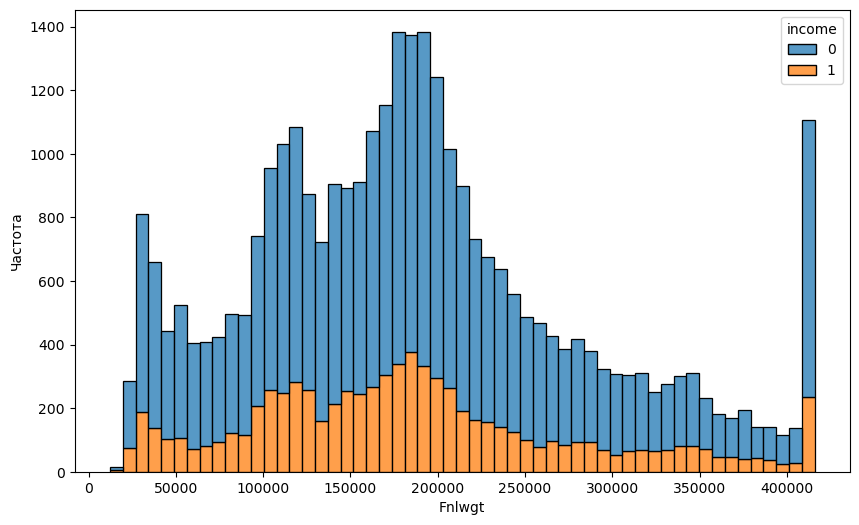

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fnlwgt', hue='income', multiple="stack")
plt.xlabel('Fnlwgt')
plt.ylabel('Частота')
plt.show()

# Подготовить признаки

In [16]:
#на всякий еще раз разделим внимательно
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [17]:
#подготовим числовые и категориальные переменные
numerical_transformer = StandardScaler() #стандартизация числовых показателей
categorical_transformer = OneHotEncoder(handle_unknown='ignore') #категоризация текстовых показателей

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])


# Поделим выборку на тестовую и обучающую

In [18]:
X = df.drop('income', axis=1) 
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [19]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Not-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Not-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Not-married,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Not-married,Adm-clerical,Own-child,White,Male,0.0,0.0,32.5,United-States


# Проведем отбор признаков

In [20]:
log_reg_sfs = LogisticRegression(max_iter = 100, solver = 'newton-cg', class_weight='balanced')

In [21]:
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                         'relationship', 'race', 'sex', 'native-country'], drop_first=True)

In [22]:
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,77516.0,13.0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311.0,13.0,0.0,0.0,32.5,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40.0,154374.0,9.0,0.0,0.0,40.0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58.0,151910.0,9.0,0.0,0.0,40.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22.0,201490.0,9.0,0.0,0.0,32.5,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
correlation_matrix = df_encoded.corr()
correlation = correlation_matrix['income'].drop('income')

In [24]:
significant_features = correlation[abs(correlation) > 0.2].index
print("Отобранные признаки по корреляции Пирсона:", significant_features.tolist())

Отобранные признаки по корреляции Пирсона: ['age', 'education-num', 'hours-per-week', 'marital-status_Not-married', 'occupation_ Exec-managerial', 'relationship_ Own-child', 'sex_ Male']


In [25]:
X_selected = df_encoded[significant_features]
y = df_encoded['income']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.8, random_state=42)

In [27]:
X_train.shape

(6512, 7)

# Опорные векторы

In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42, tol = 0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8235248953894583
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     19776
           1       0.70      0.47      0.56      6273

    accuracy                           0.82     26049
   macro avg       0.77      0.70      0.73     26049
weighted avg       0.81      0.82      0.81     26049

Confusion Matrix:
 [[18511  1265]
 [ 3332  2941]]


# Валидация

In [28]:
parameters = [
    {'penalty': ['l1', 'l2'], 'dual': ['auto', True,False], 'C': np.linspace(0,1,10) }]

In [31]:
from sklearn import svm
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

clf = GridSearchCV(svm.LinearSVC(), parameters, cv = kf, verbose = 3, scoring = 'roc_auc')

In [33]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.0, dual=auto, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.0, dual=auto, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.0, dual=auto, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.0, dual=auto, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.0, dual=auto, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.0, dual=auto, penalty=l2;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.0, dual=auto, penalty=l2;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.0, dual=auto, penalty=l2;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.0, dual=auto, penalty=l2;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.0, dual=auto, penalty=l2;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.0, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.0, dual=True, penalty=

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.1111111111111111, dual=auto, penalty=l1;, score=0.858 total time=   0.0s
[CV 1/5] END C=0.1111111111111111, dual=auto, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.1111111111111111, dual=auto, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.1111111111111111, dual=auto, penalty=l2;, score=0.874 total time=   0.0s
[CV 4/5] END C=0.1111111111111111, dual=auto, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.1111111111111111, dual=auto, penalty=l2;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.1111111111111111, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=0.1111111111111111, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=0.1111111111111111, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=0.1111111111111111, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=0.1111111111111111, dual=True, penalty=l1;, score=nan total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.1111111111111111, dual=True, penalty=l2;, score=0.875 total time=   0.1s
[CV 2/5] END C=0.1111111111111111, dual=True, penalty=l2;, score=0.864 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.1111111111111111, dual=True, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1111111111111111, dual=True, penalty=l2;, score=0.874 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.1111111111111111, dual=True, penalty=l2;, score=0.858 total time=   0.1s
[CV 1/5] END C=0.1111111111111111, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.1111111111111111, dual=False, penalty=l1;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.1111111111111111, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.1111111111111111, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.1111111111111111, dual=False, penalty=l1;, score=0.858 total time=   0.0s
[CV 1/5] END C=0.1111111111111111, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.1111111111111111, dual=False, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.1111111111111111, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 4/5] END C=0.1111111111111111, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.1111111111111111, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.2222222222222222, dual=auto, penalty=l1;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.2222222222222222, dual=auto, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.2222222222222222, dual=auto, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.2222222222222222, dual=auto, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.2222222222222222, dual=auto, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.2222222222222222, dual=auto, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.2222222222222222, dual=auto, penalty=l2;, score=0.874 total time=   0.0s
[CV 4/5] END C=0.2222222222222222, dual=auto, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.2222222222222222, dual=auto, penalty=l2;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.2222222222222222, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=0.2222222222222222, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.2222222222222222, dual=True, penalty=l2;, score=0.879 total time=   0.1s
[CV 2/5] END C=0.2222222222222222, dual=True, penalty=l2;, score=0.866 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.2222222222222222, dual=True, penalty=l2;, score=0.875 total time=   0.1s
[CV 4/5] END C=0.2222222222222222, dual=True, penalty=l2;, score=0.869 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.2222222222222222, dual=True, penalty=l2;, score=0.857 total time=   0.1s
[CV 1/5] END C=0.2222222222222222, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.2222222222222222, dual=False, penalty=l1;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.2222222222222222, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.2222222222222222, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.2222222222222222, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.2222222222222222, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.2222222222222222, dual=False, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.2222222222222222, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 4/5] END C=0.2222222222222222, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.2222222222222222, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.3333333333333333, dual=True, penalty=l2;, score=0.876 total time=   0.1s
[CV 2/5] END C=0.3333333333333333, dual=True, penalty=l2;, score=0.850 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.3333333333333333, dual=True, penalty=l2;, score=0.870 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.3333333333333333, dual=True, penalty=l2;, score=0.870 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.3333333333333333, dual=True, penalty=l2;, score=0.857 total time=   0.1s
[CV 1/5] END C=0.3333333333333333, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.3333333333333333, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.3333333333333333, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.3333333333333333, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.3333333333333333, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.3333333333333333, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.3333333333333333, dual=False, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.3333333333333333, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 4/5] END C=0.3333333333333333, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.3333333333333333, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.4444444444444444, dual=True, penalty=l2;, score=0.862 total time=   0.1s
[CV 2/5] END C=0.4444444444444444, dual=True, penalty=l2;, score=0.848 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.4444444444444444, dual=True, penalty=l2;, score=0.871 total time=   0.1s
[CV 4/5] END C=0.4444444444444444, dual=True, penalty=l2;, score=0.868 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.4444444444444444, dual=True, penalty=l2;, score=0.851 total time=   0.1s
[CV 1/5] END C=0.4444444444444444, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.4444444444444444, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.4444444444444444, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.4444444444444444, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.4444444444444444, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.4444444444444444, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.4444444444444444, dual=False, penalty=l2;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.4444444444444444, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.4444444444444444, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.4444444444444444, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5555555555555556, dual=True, penalty=l2;, score=0.873 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5555555555555556, dual=True, penalty=l2;, score=0.864 total time=   0.1s
[CV 3/5] END C=0.5555555555555556, dual=True, penalty=l2;, score=0.874 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.5555555555555556, dual=True, penalty=l2;, score=0.866 total time=   0.1s
[CV 5/5] END C=0.5555555555555556, dual=True, penalty=l2;, score=0.857 total time=   0.1s
[CV 1/5] END C=0.5555555555555556, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.5555555555555556, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.5555555555555556, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.5555555555555556, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.5555555555555556, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.5555555555555556, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.5555555555555556, dual=False, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.5555555555555556, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.5555555555555556, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.6666666666666666, dual=True, penalty=l2;, score=0.879 total time=   0.1s
[CV 2/5] END C=0.6666666666666666, dual=True, penalty=l2;, score=0.866 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.6666666666666666, dual=True, penalty=l2;, score=0.826 total time=   0.1s
[CV 4/5] END C=0.6666666666666666, dual=True, penalty=l2;, score=0.868 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.6666666666666666, dual=True, penalty=l2;, score=0.847 total time=   0.1s
[CV 1/5] END C=0.6666666666666666, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.6666666666666666, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.6666666666666666, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.6666666666666666, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.6666666666666666, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.6666666666666666, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.6666666666666666, dual=False, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.6666666666666666, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.6666666666666666, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.6666666666666666, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.7777777777777777, dual=True, penalty=l2;, score=0.877 total time=   0.1s
[CV 2/5] END C=0.7777777777777777, dual=True, penalty=l2;, score=0.863 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.7777777777777777, dual=True, penalty=l2;, score=0.874 total time=   0.1s
[CV 4/5] END C=0.7777777777777777, dual=True, penalty=l2;, score=0.864 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.7777777777777777, dual=True, penalty=l2;, score=0.848 total time=   0.1s
[CV 1/5] END C=0.7777777777777777, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.7777777777777777, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.7777777777777777, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.7777777777777777, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.7777777777777777, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.7777777777777777, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.7777777777777777, dual=False, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.7777777777777777, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.7777777777777777, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.7777777777777777, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.8888888888888888, dual=True, penalty=l2;, score=0.874 total time=   0.1s
[CV 2/5] END C=0.8888888888888888, dual=True, penalty=l2;, score=0.866 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.8888888888888888, dual=True, penalty=l2;, score=0.866 total time=   0.1s
[CV 4/5] END C=0.8888888888888888, dual=True, penalty=l2;, score=0.874 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.8888888888888888, dual=True, penalty=l2;, score=0.857 total time=   0.1s
[CV 1/5] END C=0.8888888888888888, dual=False, penalty=l1;, score=0.882 total time=   0.1s
[CV 2/5] END C=0.8888888888888888, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.8888888888888888, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.8888888888888888, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.8888888888888888, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.8888888888888888, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END C=0.8888888888888888, dual=False, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END C=0.8888888888888888, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.8888888888888888, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END C=0.8888888888888888, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ......C=1.0, dual=auto, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END ......C=1.0, dual=auto, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END ......C=1.0, dual=auto, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END ......C=1.0, dual=auto, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END ......C=1.0, dual=auto, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END ......C=1.0, dual=auto, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END ......C=1.0, dual=auto, penalty=l2;, score=0.859 total time=   0.0s
[CV 1/5] END ........C=1.0, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ........C=1.0, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ........C=1.0, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ........C=1.0, dual=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ........C=1.0, dual=True, penalty=l1;, score=nan total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ......C=1.0, dual=True, penalty=l2;, score=0.867 total time=   0.1s
[CV 2/5] END ......C=1.0, dual=True, penalty=l2;, score=0.859 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ......C=1.0, dual=True, penalty=l2;, score=0.874 total time=   0.1s
[CV 4/5] END ......C=1.0, dual=True, penalty=l2;, score=0.863 total time=   0.1s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ......C=1.0, dual=True, penalty=l2;, score=0.849 total time=   0.1s
[CV 1/5] END .....C=1.0, dual=False, penalty=l1;, score=0.882 total time=   0.0s
[CV 2/5] END .....C=1.0, dual=False, penalty=l1;, score=0.865 total time=   0.0s
[CV 3/5] END .....C=1.0, dual=False, penalty=l1;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=1.0, dual=False, penalty=l1;, score=0.874 total time=   0.0s
[CV 5/5] END .....C=1.0, dual=False, penalty=l1;, score=0.859 total time=   0.0s
[CV 1/5] END .....C=1.0, dual=False, penalty=l2;, score=0.882 total time=   0.0s
[CV 2/5] END .....C=1.0, dual=False, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END .....C=1.0, dual=False, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=1.0, dual=False, penalty=l2;, score=0.874 total time=   0.0s
[CV 5/5] END .....C=1.0, dual=False, penalty=l2;, score=0.859 total time=   0.0s


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mrrr_\anaconda3\Lib\site-packages

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearSVC(),
             param_grid=[{'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'dual': ['auto', True, False],
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc', verbose=3)

In [34]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_model = SVC(random_state=42, probability=True)

parameters = [
    {'kernel': ['linear'], 'C': [0.1, 1]},              
]

clf = GridSearchCV(svm_model, parameters, cv=kf, verbose=3, scoring='roc_auc')

clf.fit(X_train, y_train)

best_params = clf.best_params_

NameError: name 'SVC' is not defined

In [1]:
best_model = clf.best_estimator_
best_model

NameError: name 'clf' is not defined

In [41]:
y_pred_prob = clf.best_estimator_.predict_proba(X_test)[:, 1] 

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.8679802703075336

# Оценка модели

In [47]:
y_pred = clf.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

fig = px.imshow(cm, 
                labels=dict(x="Predicted", y="True", color="Count"),
                x=["Negative", "Positive"], 
                y=["Negative", "Positive"], 
                color_continuous_scale='Blues')
fig.update_layout(title="Confusion Matrix")
fig.show()

# Оценка параметров

In [54]:
feature_importance = np.abs(clf.best_estimator_.coef_[0])

feature_names = X_train.columns  # Assuming X_train is a DataFrame
importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })